# **Managing Required Connections**


**Connecting to GPU**

In [1]:
!nvidia-smi

Sun Jul 25 22:15:21 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**Mounting Google Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing the required Packages**

In [ ]:
!git clone 'https://github.com/AlexeyAB/darknet.git' '/content/drive/My Drive/yolov3_multiclass/darknet'

In [3]:
%cd '/content/drive/My Drive/yolov3_multiclass/darknet'

/content/drive/My Drive/yolov3_multiclass/darknet


# **Training Model**

**Change Files Configuration for our YOLOv3 Road Defects Detection Model**

**Running Makefile**



In [ ]:
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

In [4]:
!make

chmod +x *.sh


## **Divide Data into Training and Testing and Save Filesnames with Paths in Separate File**

In [5]:
%cd /content/drive/My Drive/yolov3_multiclass

/content/drive/My Drive/yolov3_multiclass


In [ ]:
!python Dataset/creating-files-data-and-name.py

In [ ]:
!python Dataset/creating-train-and-test-txt-files.py

## **Start Training on Preprocessed Labeled Images**

In [ ]:
!chmod +x ./darknet/darknet

In [ ]:
!./darknet/darknet detector train Dataset/labelled_data.data darknet/cfg/yolov3_custom.cfg custom_weight/darknet53.conv.74 -dont_show

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
yolov3_custom
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 4, batch = 64, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 

**Continue Training Using Last Checkpoint**

In [ ]:
!./darknet/darknet detector train Dataset/labelled_data.data darknet/cfg/yolov3_custom.cfg backup/yolov3_custom_last.weights -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.006028, iou_loss = 0.000000, total_loss = 0.006028 
 total_bbox = 78490, rewritten_bbox = 0.291757 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.867029), count: 5, class_loss = 0.284332, iou_loss = 0.115553, total_loss = 0.399885 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.801232), count: 1, class_loss = 0.000062, iou_loss = 0.022382, total_loss = 0.022444 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.884854), count: 4, class_loss = 0.004006, iou_loss = 0.031812, total_loss = 0.035818 
 total_bbox = 78500, rewritten_bbox = 0.291720 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.790633), count: 10, class_loss = 0.914782, iou_loss = 1.083078, total_loss = 1.997860 
v3 (ms


# **Testing Model**

In [ ]:
%cd '/content/drive/My Drive/yolov3_multiclass/'

/content/drive/My Drive/yolov3_multiclass


In [ ]:
# define imshow custom function
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

**Getting Important Imports**

In [7]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import glob
import random

## **Testing our YOLOv3 Custom Model on New Images**

0
3
[[0]
 [1]]


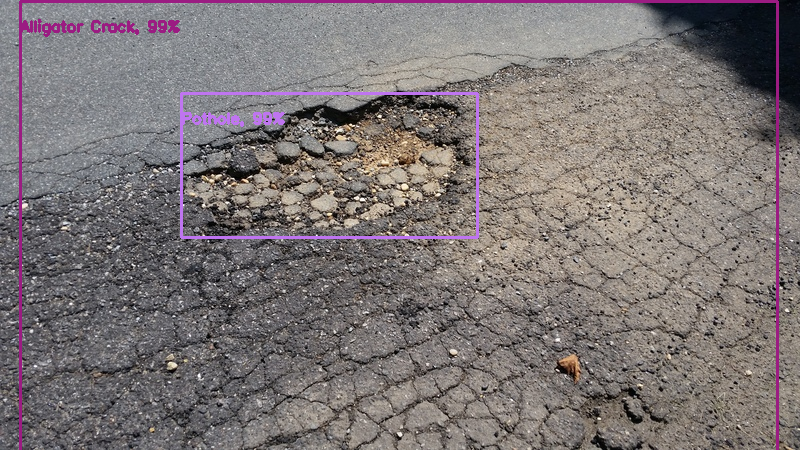

In [11]:
# Load Yolo (custom weight and cfg file)
net = cv2.dnn.readNet("backup/yolov3_custom_final.weights", "darknet/cfg/yolov3_custom.cfg")

# Defects (object) classes names
classes = ["Pothole", "Longitudinal Crack", "Transverse Crack", "Alligator Crack"]

# Images path
images_path = glob.glob(r"test_images/27.jpg")


layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

# Shuffling images
random.shuffle(images_path)

# looping through images
for img_path in images_path:
    # Loading image
    img = cv2.imread(img_path)
    #img = cv2.resize(img, None, fx=0.4, fy=0.4)
    height, width, channels = img.shape

    # Detecting objects using deep neural network
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

    net.setInput(blob)
    outs = net.forward(output_layers)

    # Showing information on the screen

    class_ids = []
    confidences = []
    boxes = []

    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.3:
                # Object detected
                print(class_id)
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Defining Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    print(indexes)
    font = cv2.FONT_HERSHEY_SIMPLEX
    u=30
    # put rectBox and Label on each detected defect
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            #confidences[i] = float("{:.2f}".format(confidences[i]))
            label = str(classes[class_ids[i]]) + ', ' + str(int(confidences[i]*100)) + '%'
            color = colors[class_ids[i]]
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
            cv2.putText(img, label, (x, y + u), font, 0.5, color, 2)


    cv2_imshow(img)
    key = cv2.waitKey(0)

cv2.destroyAllWindows()